##Code for Word2Vec

Data: https://www.kaggle.com/datasets/khulasasndh/game-of-thrones-books

In [2]:
import pandas as pd
import numpy as np
import os
import gensim
import nltk

In [ ]:
nltk.download("all")

In [4]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess #basic preprocessing and automatically conver sentence into tokens


In [6]:
for file in os.listdir("/content/data"):
  print(file)

005ssb.txt
004ssb.txt
001ssb.txt
002ssb.txt
003ssb.txt


In [7]:

f = open("/content/data/001ssb.txt",encoding ="unicode_escape")
corpus= f.read()

In [8]:
raw_sentence = sent_tokenize(corpus)

In [ ]:
for i in raw_sentence:
  print(simple_preprocess(i))


In [11]:
story=[]
for filename in os.listdir("/content/data"):
  filepath=os.path.join("/content/data",filename)
  with open(filepath,encoding="unicode_escape")as f:
    corpus=f.read()
  raw_sentences=sent_tokenize(corpus)
  for sent in raw_sentences:
    story.append(simple_preprocess(sent))

In [12]:
len(story)

145020

In [13]:
story[7]

['rather',
 'than',
 'being',
 'sequential',
 'the',
 'two',
 'books',
 'are',
 'parallel',
 'divided',
 'geographically',
 'rather',
 'than',
 'chronologically']

In [14]:
from gensim.models import Word2Vec
from gensim.models.word2vec import Word2Vec
model=Word2Vec(window=10,min_count=5,vector_size=150)#context window size is 10 ,Vector dimension is 150 default value is 100

In [ ]:
#model=gensim.models.word2vec(window=10,min_count=5,vector_size=150)#context window size is 10 ,Vector dimension is 150 default value is 100
#model=gensim.models.Word2vec(window=10,min_count=5,vector=150)

In [15]:
#to build the vocab
model.build_vocab(story)

In [16]:
model.epochs

5

In [17]:
model.corpus_count

145020

In [18]:
model.corpus_total_words

1725638

In [19]:
model.min_count

5

In [20]:
model.train(story,total_examples=model.corpus_count,epochs=model.epochs)

(6482927, 8628190)

In [21]:
model.wv.get_normed_vectors().shape #total number of vectors

(11760, 150)

In [ ]:
model.wv.index_to_key

In [24]:
len(model.wv.index_to_key)

11760

In [25]:
model.wv.most_similar("king")

[('realm', 0.6784332394599915),
 ('prince', 0.669420599937439),
 ('baratheon', 0.6627554893493652),
 ('throne', 0.644426167011261),
 ('tourney', 0.5990457534790039),
 ('victory', 0.5905713438987732),
 ('lannisters', 0.5832441449165344),
 ('usurper', 0.5800471901893616),
 ('council', 0.575627863407135),
 ('stannis', 0.574170708656311)]

In [26]:
model.wv.most_similar("queen")

[('princess', 0.7357994914054871),
 ('margaery', 0.7039681673049927),
 ('prince', 0.7009903788566589),
 ('daenerys', 0.6881498098373413),
 ('myrcella', 0.6619316935539246),
 ('elia', 0.6549037098884583),
 ('joffrey', 0.6526364684104919),
 ('cersei', 0.6517835855484009),
 ('mother', 0.6385722160339355),
 ('imp', 0.6227278113365173)]

In [27]:
model.wv.most_similar("daenerys")

[('stormborn', 0.7977011799812317),
 ('targaryen', 0.7294933795928955),
 ('queen', 0.6881496906280518),
 ('unburnt', 0.6834090948104858),
 ('princess', 0.6543430685997009),
 ('dragons', 0.6347925662994385),
 ('dorne', 0.6294481754302979),
 ('elia', 0.6184465885162354),
 ('myrcella', 0.6119629144668579),
 ('khal', 0.6008322834968567)]

In [28]:
model.wv.most_similar("dhoni")

KeyError: "Key 'dhoni' not present in vocabulary"

In [29]:
model.wv.doesnt_match(['jon','rikon','robb','arya','sansa','bran'])

'jon'

In [30]:
model.save("wordtoVec.model")

In [31]:
model.save("wordtoVec.model.bin")

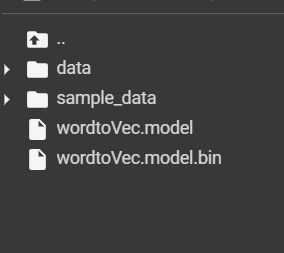

In [32]:
!gzip wordtoVec.model.bin > word2vec.bin.gz

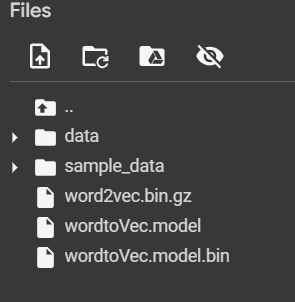**bold text**

In [33]:
import numpy as np
from sklearn.decomposition import PCA
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [34]:
vectors = model.wv.get_normed_vectors()
y=model.wv.index_to_key

In [35]:
pca=PCA(n_components=3)
X=pca.fit_transform(vectors)

In [36]:
X.shape

(11760, 3)

In [37]:
import plotly.express as px
fig = px.scatter_3d(X[200:300],x=0,y=1,z=2,color=y[200:300])
fig.show()